lambda = 1, accuracy = 0.853
lambda = 2001, accuracy = 0.8819999999999999
lambda = 4001, accuracy = 0.885
lambda = 6001, accuracy = 0.8859999999999999
lambda = 8001, accuracy = 0.8869999999999999
lambda = 10001, accuracy = 0.885
lambda = 12001, accuracy = 0.884
lambda = 14001, accuracy = 0.884
lambda = 16001, accuracy = 0.885
lambda = 18001, accuracy = 0.884
lambda = 20001, accuracy = 0.884
lambda = 22001, accuracy = 0.884
lambda = 24001, accuracy = 0.884
lambda = 26001, accuracy = 0.885
lambda = 28001, accuracy = 0.883
lambda = 30001, accuracy = 0.883
lambda = 32001, accuracy = 0.883
lambda = 34001, accuracy = 0.883
lambda = 36001, accuracy = 0.882
lambda = 38001, accuracy = 0.882
lambda = 40001, accuracy = 0.882
lambda = 42001, accuracy = 0.881
lambda = 44001, accuracy = 0.8800000000000001
lambda = 46001, accuracy = 0.8790000000000001
lambda = 48001, accuracy = 0.8780000000000001
lambda = 50001, accuracy = 0.875
lambda = 52001, accuracy = 0.873
lambda = 54001, accuracy = 0.873
lambda

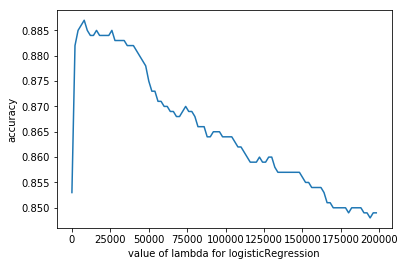

In [4]:
import numpy as np
from numpy import *
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
import csv
import math
import random
import operator
import matplotlib.pyplot as plt
import collections

# function to import train data
def importData(file):
    data = []
    csvFile = open(file, "r")
    csv_reader = csv.reader(csvFile, delimiter=',')
    
    for row in csv_reader:
        tmp = [1]
        for col in row:
            tmp.append(int(col))
        data.append(tmp)
        
    return data

def importLabel(file):
    data = []
    csvFile = open(file, "r")
    csv_reader = csv.reader(csvFile, delimiter=',')
    
    for row in csv_reader:
        tmp = []
        for col in row:
            tmp.append(int(col))
        data.append(tmp)
        
    return data

def ls(a):
    return 1 / (1 + math.exp(-a))

W_ret = np.zeros((65,1))
W0_ret = 0

def logisticRegression(k, xTrain, xValidation, yTrain, yValidation):
    I = np.zeros((len(xTrain[0]),len(xTrain[0])))
    R = np.zeros((len(xTrain),len(xTrain))) 
    for i in range(len(I)):
        I[i][i] = 1
    lambdaI = k * I
    X = np.matrix(xTrain)
    X = X.getT()
    XT = X.getT()
    W = np.matrix(np.zeros((65,1)))
    for n in range(10):
        G = np.zeros((65,1))
        for i in range(len(xTrain)):
            Xi = np.matrix(xTrain[i])
            Xi = Xi.getT()
            z = float(ls(dot(W.getT(), Xi)))
            R[i][i] = z * (1 - z)
            if yTrain[i][0] == 5:
                G += (z - 1) * Xi
            else:
                G += z * Xi
        G = G + k * W
        H = dot(dot(X, R), XT) + lambdaI
        W = W - dot(H.getI(), G)
    corr = 0
    for i in range(len(xValidation)):
        Xi = np.matrix(xValidation[i])
        Xi = Xi.getT()
        z = float(ls(dot(W.getT(), Xi)))
        if z >= 0.5:
            if yValidation[i][0] == 5:
                corr += 1
        else:
            if yValidation[i][0] == 6:
                corr += 1
    W_ret = W
    W0_ret = z
    return corr / len(xValidation)


# import train data & labels
X = []
Y = []
for i in range(1, 11):
    X += importData("trainData" + str(i) + ".csv")
    Y += importLabel("trainLabels" + str(i) + ".csv")
X = np.array(X)
Y = np.array(Y)

#import test data & labels
x = importData("testData.csv")
y = importLabel("testLabels.csv")

# 10-fold validation initialize
kf = KFold(n_splits=10)

# set lambda
iRange = np.arange(100)
lRange = np.arange(1, 200001, 2000)
result = np.zeros(100)
best = 0
lamb = 0
for k in iRange:
    i = lRange[k]
    total = 0
    for train_index, test_index in kf.split(X):
        #print("train:", train_index, "validation:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        total += logisticRegression(i, X_train, X_test, Y_train, Y_test)
    avg = total / 10
    print("lambda = " + str(i) + ", accuracy = " + str(avg))
    result[k] = avg    
    if avg > best:
        lamb = i
        best = avg

print("--------------result----------------")
acc = logisticRegression(lamb, X, x, Y, y)
print("lambda chosen is: " + str(lamb))
print("acc for test set is: " + str(acc))

plt.plot(lRange, result)
plt.xlabel("value of lambda for logisticRegression")
plt.ylabel("accuracy")
plt.show()    